# Playground

This is a safe space to conduct experiments and even fail. Success will eventually come!

In [2]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from utils import generate_random_floats

## Curve Fitting

In [3]:
def create_interpolation_function(x_points, y_points):
    ''' Function that creates a function that interpolates
        values between given x and y points. This new interpolation
        function is returned such that given any new x axis value,
        corresponding y axis value on the curve as per fitted data
        is returned.
    '''
    # Check if the number of x and y points match.
    if len(x_points) != len(y_points):
        raise ValueError("Number of x and y points must be the same.")
    
    # Create the interpolation function.
    interpolation_function = interp1d(
        x_points, y_points, 
        kind='linear', fill_value="extrapolate"
    )

    # Define a new function that takes an x value 
    # and returns the interpolated y value.
    def interpolated_function(x):
        return float(interpolation_function(x))

    return interpolated_function

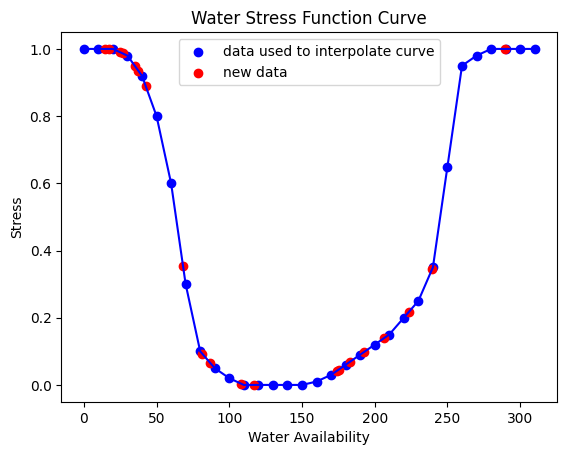

In [3]:
df_water_stress = pd.read_csv('./data/water_stress.csv')
curve_fn_water_stress = create_interpolation_function(
    df_water_stress.water_availability, 
    df_water_stress.stress
)
plt.scatter(
    df_water_stress['water_availability'], 
    df_water_stress['stress'],
    color='blue', label='data used to interpolate curve'
)
plt.plot(
    df_water_stress['water_availability'], 
    df_water_stress['stress'],
    color='blue'
)
new_points = sorted(generate_random_floats(20, 0, 320))
plt.scatter(
    new_points, [curve_fn_water_stress(x) for x in new_points],
    color='red', label='new data'
)
plt.xlabel('Water Availability')
plt.ylabel('Stress')
plt.title('Water Stress Function Curve')
plt.legend()
plt.savefig('./figures/water_stress_curve.png')
plt.show()

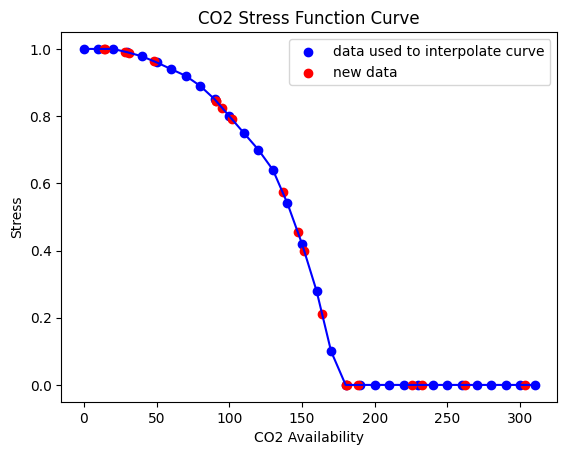

In [4]:
df_co2_stress = pd.read_csv('./data/co2_stress.csv')
curve_fn_co2_stress = create_interpolation_function(
    df_co2_stress.co2_availability, 
    df_co2_stress.stress
)
plt.scatter(
    df_co2_stress['co2_availability'], 
    df_co2_stress['stress'],
    color='blue', label='data used to interpolate curve'
)
plt.plot(
    df_co2_stress['co2_availability'], 
    df_co2_stress['stress'],
    color='blue'
)
new_points = sorted(generate_random_floats(20, 0, 320))
plt.scatter(
    new_points, [curve_fn_co2_stress(x) for x in new_points],
    color='red', label='new data'
)
plt.xlabel('CO2 Availability')
plt.ylabel('Stress')
plt.title('CO2 Stress Function Curve')
plt.legend()
plt.savefig('./figures/co2_stress_curve.png')
plt.show()

In [4]:
df_temp_stress = pd.read_csv('./data/temp_stress.csv')
curve_fn_temp_stress = create_interpolation_function(
    df_temp_stress.temperature, 
    df_temp_stress.stress
)
plt.scatter(
    df_temp_stress['temperature'], 
    df_temp_stress['stress'],
    color='blue', label='data used to interpolate curve'
)
plt.plot(
    df_temp_stress['temperature'], 
    df_temp_stress['stress'],
    color='blue'
)
new_points = sorted(generate_random_floats(20, 0, 100))
plt.scatter(
    new_points, [curve_fn_temp_stress(x) for x in new_points],
    color='red', label='new data'
)
plt.xlabel('Temperature')
plt.ylabel('Stress')
plt.title('Temperature Stress Function Curve')
plt.legend()
plt.savefig('./figures/temp_stress_curve.png')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data/temp_stress.csv'

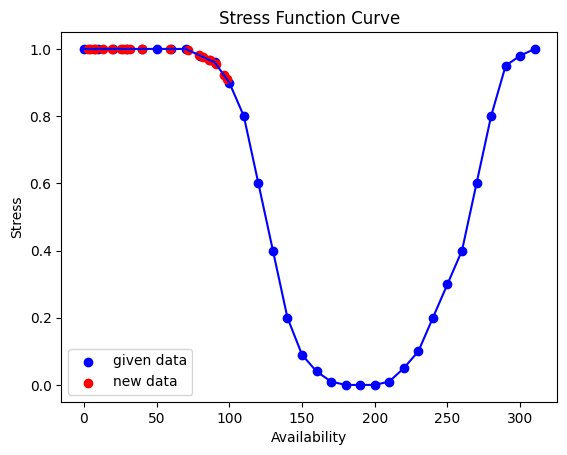

In [25]:
# Trial zone.
df = pd.read_csv('./data/water_stress_sensitive_deciduous.csv')
curve_fn = create_interpolation_function(df.availability, df.stress)
plt.scatter(df['availability'], df['stress'], color='blue', label='given data')
plt.plot(df['availability'], df['stress'], color='blue')
new_points = sorted(generate_random_floats(20, 0, 100))
plt.scatter(new_points, [curve_fn(x) for x in new_points], color='red', label='new data')
plt.xlabel('Availability')
plt.ylabel('Stress')
plt.title('Stress Function Curve')
plt.legend()
plt.show()

In [26]:
df.to_numpy().tolist()

[[0.0, 1.0],
 [10.0, 1.0],
 [20.0, 1.0],
 [30.0, 1.0],
 [40.0, 1.0],
 [50.0, 1.0],
 [60.0, 1.0],
 [70.0, 1.0],
 [80.0, 0.98],
 [90.0, 0.96],
 [100.0, 0.9],
 [110.0, 0.8],
 [120.0, 0.6],
 [130.0, 0.4],
 [140.0, 0.2],
 [150.0, 0.09],
 [160.0, 0.04],
 [170.0, 0.01],
 [180.0, 0.0],
 [190.0, 0.0],
 [200.0, 0.0],
 [210.0, 0.01],
 [220.0, 0.05],
 [230.0, 0.1],
 [240.0, 0.2],
 [250.0, 0.3],
 [260.0, 0.4],
 [270.0, 0.6],
 [280.0, 0.8],
 [290.0, 0.95],
 [300.0, 0.98],
 [310.0, 1.0]]

In [ ]:
p = new_points[5]
print(round(p, 2))
curve_fn(p)